In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/textdb3/fake_or_real_news.csv
/kaggle/input/fake-news/fake.csv
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv
/kaggle/input/source-based-news-classification/news_articles.csv


In [2]:
try:
    import pycaret
except:
    !pip install pycaret

try:
    import explainerdashboard
except:
    !pip install explainerdashboard    

     |████████████████████████████████| 301 kB 5.1 MB/s            
     |████████████████████████████████| 25.9 MB 49.0 MB/s            
     |████████████████████████████████| 24.2 MB 20.7 MB/s            
     |████████████████████████████████| 167 kB 42.9 MB/s            
     |████████████████████████████████| 114 kB 53.5 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 636 kB 48.4 MB/s            
     |████████████████████████████████| 15.6 MB 32.0 MB/s            
     |████████████████████████████████| 10.4 MB 32.0 MB/s            
     |████████████████████████████████| 184 kB 42.6 MB/s            
     |████████████████████████████████| 1.0 MB 51.1 MB/s            
     |████████████████████████████████| 14.8 MB 50.6 MB/s            
     |████████████████████████████████| 58 kB 4.3 MB/s             
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 79 kB 7.5 MB/s             
  Created w

In [3]:
!python -m spacy download en_core_web_sm
!python -m textblob.download_corpora

     |████████████████████████████████| 12.0 MB 5.0 MB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047105 sha256=a6c96cb204be6e211d937a0b6d38197c582bac058d8f552ddf00f364bdb9f6d4
  Stored in directory: /root/.cache/pip/wheels/b7/0d/f0/7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.1.0
    Uninstalling en-core-web-sm-3.1.0:
      Successfully uninstalled en-core-web-sm-3.1.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_da

<hr style="border: solid 3px blue;">

# Introduction

![](https://miro.medium.com/max/1400/0*Qq8FcR-mgnvjWZLQ.gif)

Picture Credit: https://miro.medium.com

**What is NLP?**
> Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.

Ref: https://en.wikipedia.org/wiki/Natural_language_processing

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

----------------------------------
## What is spacy?

![](https://spacy.io/architecture-415624fc7d149ec03f2736c4aa8b8f3c.svg)

Picture Credit: https://spacy.io/

> spaCy is a library for advanced Natural Language Processing in Python and Cython. It's built on the very latest research, and was designed from day one to be used in real products.
> 
> spaCy comes with pretrained pipelines and currently supports tokenization and training for 60+ languages. It features state-of-the-art speed and neural network models for tagging, parsing, named entity recognition, text classification and more, multi-task learning with pretrained transformers like BERT, as well as a production-ready training system and easy model packaging, deployment and workflow management. spaCy is commercial open-source software, released under the MIT license.

Ref: https://github.com/explosion/spaCy

In [5]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [6]:
true_df = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
false_df = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

In [7]:
true_df['class'] = 1
false_df['class'] = 0

fake_news_df = pd.concat([true_df,false_df])

In [8]:
fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [9]:
fake_news_df = fake_news_df.sample(10000, random_state=786).reset_index(drop=True)

In [10]:
fake_news_df.head()

,title,text,subject,date,class
0,Trump Is Now Officially Increasing The Chance...,Republicans aren t very smart about a lot of t...,News,"April 17, 2016",0
1,GAY PAYPAL CEO Gives Rousing Speech Endorsing ...,,politics,"Oct 31, 2016",0
2,"Buoyed by mayoral votes, Venezuela socialists ...",CARACAS (Reuters) - President Nicolas Maduro h...,worldnews,"December 10, 2017",1
3,Oklahoma lawmaker apologizes for linking Nativ...,"TULSA, Okla. (Reuters) - An Oklahoma state leg...",politicsNews,"April 28, 2016",1
4,Argentine mid-term campaign pauses after body ...,BUENOS AIRES (Reuters) - Major parties running...,worldnews,"October 18, 2017",1


-----------------------------------------------------
## Checking Target blance

In [11]:
colors = ['gold', 'mediumturquoise']
labels = ['REAL','FAKE']
values = fake_news_df['class'].value_counts()/fake_news_df['class'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Target Balance",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

<span style="color:Blue"> Observation:
    
**OK! Target is well balanced**

<hr style="border: solid 3px blue;">

# NLP Text Classification using PyCaret

--------------------
## Setting up

> This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function.

Ref: https://pycaret.readthedocs.io/en/latest/api/nlp.html

In [12]:
from pycaret.nlp import *
%time 
fake_news_nlp = setup(data = fake_news_df, target = 'text', session_id = 123)

Description,Value
session_id,123
Documents,10000
Vocab Size,34527
Custom Stopwords,False


<span style="color:Blue"> Observation:
    
The size of the vocabulary is 34527.

---------------------------------------------------------
## Latent Dirichlet allocation

![](https://ars.els-cdn.com/content/image/1-s2.0-S0164121218302103-gr6.jpg)

Picture Credit: https://ars.els-cdn.com

> In natural language processing, the latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. LDA is an example of a topic model.

Ref: https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

In [13]:
%time 
lda = create_model('lda',multi_core=True)

-------------------------------------
## Embedding on the processed text data

In [14]:
%time 
lda_df = assign_model(lda)

-------------------------------------------
## Plotting the trained model

> This function takes a trained model object (optional) and returns a plot based on the inferred dataset by internally calling assign_model before generating a plot. Where a model parameter is not passed, a plot on the entire dataset will be returned instead of one at the topic level. As such, plot_model can be used with or without model. All plots with a model parameter passed as a trained model object will return a plot based on the first topic i.e. ‘Topic 0’. This can be changed using the topic_num param.

Ref: https://pycaret.readthedocs.io/en/latest/api/nlp.html

In [15]:
plot_model(lda, plot = 'topic_distribution')

<span style="color:Blue"> Observation:
    
Documents related to Topic 2 are the most. Keywords related to Topic 2 include 'say', 'government', 'year', and 'state'.

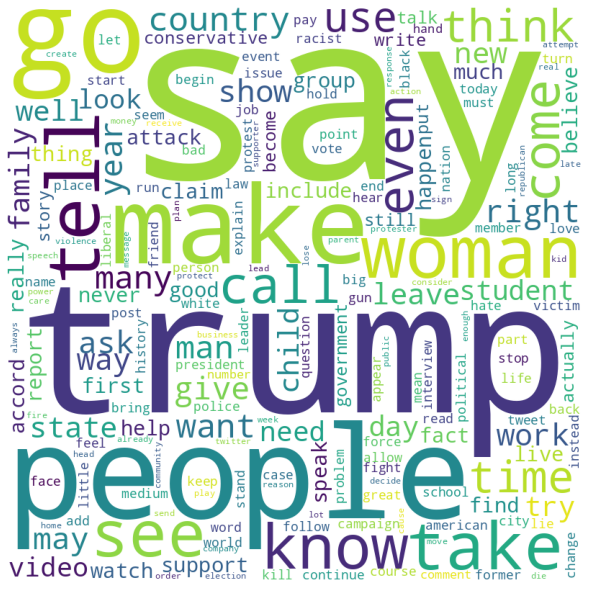

In [16]:
plot_model(lda, plot = 'wordcloud')

<span style="color:Blue"> Observation:
    
Looking at the word cloud, the selected words look reasonable.

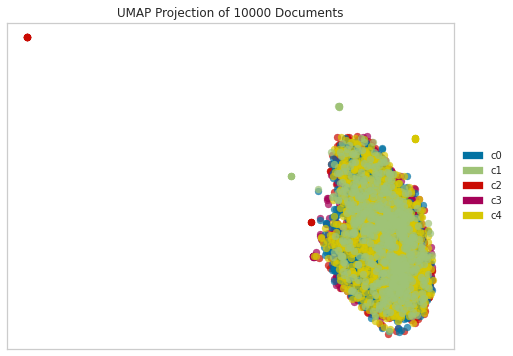

In [17]:
plot_model(lda, plot = 'umap')

In [18]:
plot_model(lda, plot = 'tsne')

<span style="color:Blue"> Observation:
    
If you look at the figure separated into dominant topics, you can see that clustering was successful.

In [19]:
plot_model(lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.143277  0.052392       1        1  32.182626
0      0.086015  0.136664       2        1  26.157528
1      0.144206 -0.044603       3        1  22.371185
3     -0.086943 -0.144453       4        1  19.288662, topic_info=           Term          Freq         Total Category  logprob  loglift
92        trump  17953.000000  17953.000000  Default  30.0000  30.0000
163    election   5118.000000   5118.000000  Default  29.0000  29.0000
366    campaign   4524.000000   4524.000000  Default  28.0000  28.0000
75          say  37012.000000  37012.000000  Default  27.0000  27.0000
186  government   6126.000000   6126.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
87         tell   1352.081328   5853.085219   Topic4  -5.3633   0.1803
684      public    994.644060   2387.395168   Topic4  -5.6703   0.7701
58       people   1379.974218   9124.053697   Topic4  -5.3428  -0.2432
389       group   1042.559696   3583.377672   Topic4  -5.6232   0.4110
297        year   1093.400240   6152.293515   Topic4  -5.5756  -0.0819

[370 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
429       1  0.303120   accord
429       2  0.135153   accord
429       3  0.170566   accord
429       4  0.391165   accord
3367      2  0.982365  actress
...     ...       ...      ...
297       4  0.177657     year
1780      1  0.053983    young
1780      2  0.773753    young
1780      3  0.124675    young
1780      4  0.047556    young

[725 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

----------------------------------------------
# What is n-gram?

> In the fields of computational linguistics and probability, an n-gram (sometimes also called Q-gram) is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles.
> 
> Using Latin numerical prefixes, an n-gram of size 1 is referred to as a "unigram"; size 2 is a "bigram" (or, less commonly, a "digram"); size 3 is a "trigram". English cardinal numbers are sometimes used, e.g., "four-gram", "five-gram", and so on. In computational biology, a polymer or oligomer of a known size is called a k-mer instead of an n-gram, with specific names using Greek numerical prefixes such as "monomer", "dimer", "trimer", "tetramer", "pentamer", etc., or English cardinal numbers, "one-mer", "two-mer", "three-mer", etc.

In [20]:
plot_model(lda, plot = 'bigram')

<span style="color:Blue"> Observation:    

There are many bigrams like 'trump supporter', 'black people', 'many people', 'trump say'.

In [21]:
plot_model(lda, plot = 'pos')

In [22]:
lda_df.drop(["text","title", "subject","date"], axis = 1, inplace=True, errors='ignore')

<hr style="border: solid 3px blue;">

# Building Model

![](https://images.squarespace-cdn.com/content/v1/5feb53185d3dab691b47361b/1609930648540-2AG2AUX4BL35UJ6H0PEZ/e2f96-old-header-machine-learning-pt1.gif)

Picture Credit: https://images.squarespace-cdn.com

In [23]:
from pycaret.classification import *

In [24]:
%time 
setup(data = lda_df, 
      target = 'class',
      silent = True)

,Description,Value
0,session_id,1781
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


([('Setup Config',
                                  Description             Value
   0                               session_id              1781
   1                                   Target             class
   2                              Target Type            Binary
   3                            Label Encoded              None
   4                            Original Data        (10000, 7)
   5                           Missing Values             False
   6                         Numeric Features                 5
   7                     Categorical Features                 1
   8                         Ordinal Features             False
   9                High Cardinality Features             False
   10                 High Cardinality Method              None
   11                   Transformed Train Set         (6999, 9)
   12                    Transformed Test Set         (3001, 9)
   13                      Shuffle Train-Test              True
   14                

-----------------------------------------
## Comparing models

> This function trains and evaluates performance of all estimators available in the model library using cross validation. The output of this function is a score grid with average cross validated scores. Metrics evaluated during CV can be accessed using the get_metrics function.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [25]:
%time 
compare_models(sort='Accuracy',n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8666,0.9354,0.8501,0.8719,0.8605,0.7327,0.7334,3.1210
gbc,Gradient Boosting Classifier,0.8610,0.9352,0.8504,0.8614,0.8556,0.7216,0.7221,0.4840
lightgbm,Light Gradient Boosting Machine,0.8610,0.9328,0.8507,0.8613,0.8556,0.7216,0.7221,0.1720
xgboost,Extreme Gradient Boosting,0.8583,0.9299,0.8448,0.8608,0.8524,0.7161,0.7167,18.4390
ada,Ada Boost Classifier,0.8578,0.9321,0.8513,0.8550,0.8530,0.7154,0.7157,0.1680
rf,Random Forest Classifier,0.8571,0.9287,0.8427,0.8601,0.8509,0.7138,0.7145,0.6250
lr,Logistic Regression,0.8491,0.9242,0.8418,0.8464,0.8439,0.6979,0.6982,0.2710
ridge,Ridge Classifier,0.8464,0.0000,0.8365,0.8453,0.8407,0.6924,0.6928,0.0120
lda,Linear Discriminant Analysis,0.8460,0.9214,0.8356,0.8452,0.8402,0.6916,0.6919,0.0150
svm,SVM - Linear Kernel,0.8458,0.0000,0.8436,0.8413,0.8412,0.6914,0.6934,0.0160


 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=1781, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=3

<span style="color:Blue"> Observation:
    
The catboost classifier has the best performance. Let's use this model!

--------------------------------------
## Creating Model

> This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold. 

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [26]:
catboost = create_model('catboost',verbose = False)

In [27]:
lightgbm = create_model('lightgbm',verbose = False)

-----------------------------------------------------
## Interpreting Model

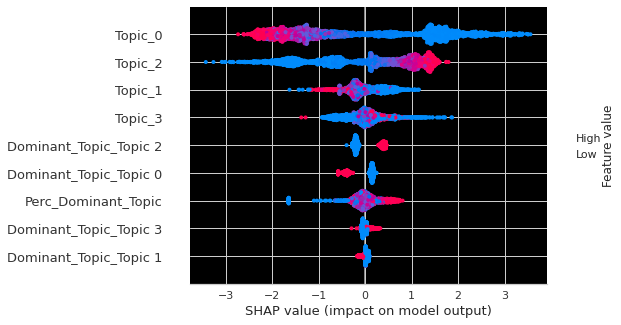

In [28]:
with plt.rc_context({'axes.facecolor':'black'}):
    interpret_model(catboost)

<span style="color:Blue"> Observation:
    
Topic_0 feature is the most important feature!

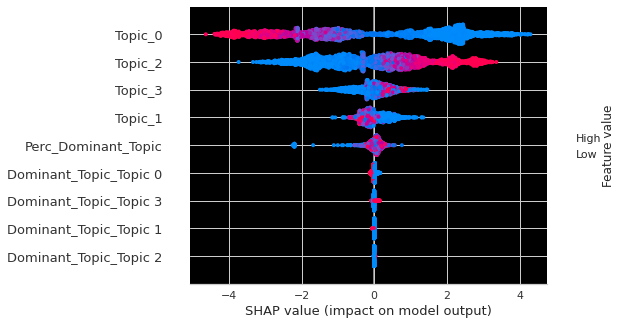

In [29]:
with plt.rc_context({'axes.facecolor':'black'}):
    interpret_model(lightgbm)

<span style="color:Blue"> Observation:
    
Topic_2 feature is the most important feature!

-----------------------------------
## Tuning Hyperparameters

> This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [30]:
%time
tuned_catboost = tune_model(catboost, optimize = 'Accuracy', early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8786,0.9487,0.8466,0.8969,0.8710,0.7565,0.7576
1,0.8743,0.9453,0.8614,0.8769,0.8690,0.7482,0.7483
2,0.8557,0.9306,0.8171,0.8766,0.8458,0.7105,0.7121
3,0.8657,0.9417,0.8584,0.8635,0.8609,0.7311,0.7311
4,0.8786,0.9424,0.8938,0.8608,0.8770,0.7572,0.7577
5,0.8614,0.9238,0.8230,0.8829,0.8519,0.7220,0.7236
6,0.8414,0.9237,0.8673,0.8167,0.8412,0.6831,0.6844
7,0.8557,0.9251,0.8437,0.8563,0.8499,0.7110,0.7111
8,0.8771,0.9439,0.8673,0.8776,0.8724,0.7540,0.7540
9,0.8727,0.9406,0.8580,0.8761,0.8670,0.7449,0.7451


In [31]:
%time
tuned_lightgbm = tune_model(lightgbm, optimize = 'Accuracy', early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8643,0.9475,0.8348,0.8789,0.8563,0.7279,0.7288
1,0.8786,0.9429,0.8614,0.8848,0.8729,0.7567,0.7570
2,0.8586,0.9292,0.8289,0.8727,0.8502,0.7164,0.7173
3,0.8629,0.9396,0.8643,0.8542,0.8592,0.7255,0.7256
4,0.8714,0.9426,0.8909,0.8507,0.8703,0.7430,0.7437
5,0.8514,0.9203,0.8171,0.8683,0.8419,0.7020,0.7032
6,0.8457,0.9233,0.8702,0.8217,0.8453,0.6917,0.6928
7,0.8571,0.9258,0.8407,0.8610,0.8507,0.7138,0.7140
8,0.8771,0.9429,0.8732,0.8732,0.8732,0.7540,0.7540
9,0.8755,0.9393,0.8491,0.8885,0.8684,0.7505,0.7511


-----------------------------------
![](https://miro.medium.com/max/873/1*JEywfu11rTcxcLCf7bMtsA.png)

Picture Credit: https://miro.medium.com

> This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list param. The output of this function is a score grid with CV scores by fold.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [32]:
blend_soft = blend_models(estimator_list = [lightgbm,catboost], optimize = 'Accuracy',method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8843,0.9463,0.8584,0.8981,0.8778,0.7680,0.7687
1,0.8786,0.9443,0.8584,0.8872,0.8726,0.7567,0.7570
2,0.8557,0.9312,0.8201,0.8742,0.8463,0.7106,0.7119
3,0.8614,0.9428,0.8614,0.8538,0.8576,0.7227,0.7227
4,0.8686,0.9367,0.8791,0.8539,0.8663,0.7371,0.7374
5,0.8586,0.9255,0.8260,0.8750,0.8498,0.7164,0.7174
6,0.8400,0.9198,0.8673,0.8144,0.8400,0.6803,0.6817
7,0.8600,0.9260,0.8378,0.8685,0.8529,0.7194,0.7198
8,0.8686,0.9427,0.8673,0.8622,0.8647,0.7369,0.7369
9,0.8655,0.9392,0.8343,0.8812,0.8571,0.7303,0.7313


--------------------------------
## Calibrating Model

> This function calibrates the probability of a given estimator using isotonic or logistic regression.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.

In [33]:
cali_model = calibrate_model(blend_soft)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8771,0.9487,0.8496,0.8916,0.8701,0.7537,0.7545
1,0.8814,0.9443,0.8643,0.8879,0.8759,0.7624,0.7627
2,0.8557,0.9312,0.8230,0.8719,0.8467,0.7106,0.7117
3,0.8629,0.9437,0.8614,0.8563,0.8588,0.7255,0.7255
4,0.8800,0.9392,0.8879,0.8674,0.8776,0.7599,0.7601
5,0.8586,0.9259,0.8319,0.8704,0.8507,0.7165,0.7171
6,0.8514,0.9222,0.8702,0.8310,0.8501,0.7030,0.7037
7,0.8643,0.9263,0.8437,0.8720,0.8576,0.7280,0.7284
8,0.8729,0.9441,0.8702,0.8676,0.8689,0.7455,0.7455
9,0.8670,0.9410,0.8432,0.8769,0.8597,0.7333,0.7338


-------------------------
## Finalizing the last model
> This function trains a given estimator on the entire dataset including the holdout set.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [34]:
final_model = finalize_model(cali_model)

----------------------------------------------
## Plotting Results

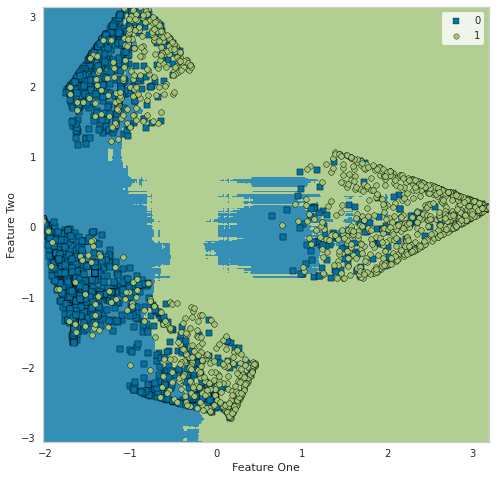

In [35]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='boundary')

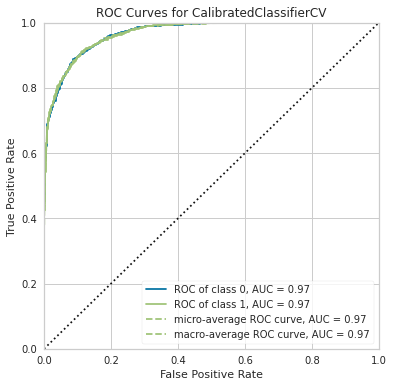

In [36]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='auc')

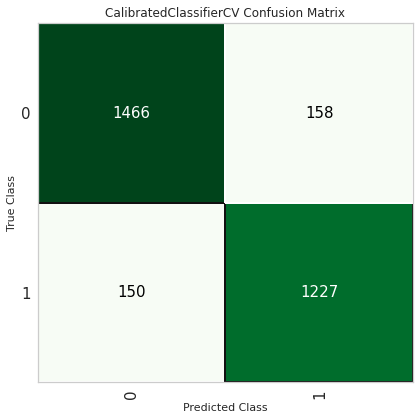

In [37]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='confusion_matrix')

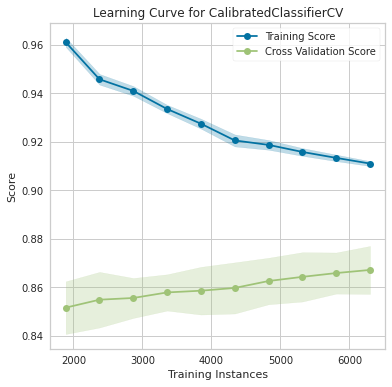

In [38]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='learning')

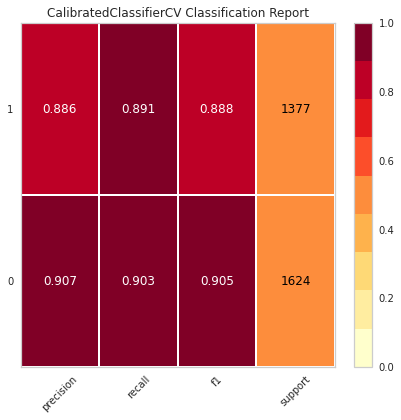

In [39]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='class_report')

<hr style="border: solid 3px blue;">